# PACOTES

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# COLETA E ENTENDIMENTO  DOS DADOS

In [2]:
## CRIANDO DATAFRAME QUE IRÁ ARMAZENAR TODOS OS DADOS
df_metadados = pd.DataFrame()

for arquivo in os.listdir('dados_olx/'):
  print(arquivo)
  df_metadados = pd.concat([df_metadados,pd.read_csv('dados_olx/'+arquivo)])

## RESET NO INDEX
df_metadados.reset_index(drop=True,inplace=True)

ac_metadados.csv
al_metadados.csv
am_metadados.csv
ap_metadados.csv
ba_metadados.csv
ce_metadados.csv
desc.txt
df_metadados.csv
es_metadados.csv
go_metadados.csv
ma_metadados.csv
mg_metadados.csv
ms_metadados.csv
mt_metadados.csv
pa_metadados.csv
pb_metadados.csv
pe_metadados.csv
pi_metadados.csv
pr_metadados.csv
rj_metadados.csv
rn_metadados.csv
ro_metadados.csv
rr_metadados.csv
rs_metadados.csv
sc_metadados.csv
se_metadados.csv
sp_metadados.csv
to_metadados.csv


In [3]:
## INFORMAÇÕES RESUMIDA DA TABELA DE DADOS
df_metadados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122890 entries, 0 to 122889
Data columns (total 12 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   ID                                           122890 non-null  float64
 1   TITULO                                       122890 non-null  object 
 2   INFOS                                        122890 non-null  object 
 3   VALOR                                        117147 non-null  object 
 4   LOCAL                                        122890 non-null  object 
 5   DATA_ANUNCIO                                 122890 non-null  object 
 6   LINK                                         122890 non-null  object 
 7   DATA_COLETA_METADADOS                        122890 non-null  object 
 8   DATA_COLETA_COMPLETA                         0 non-null       float64
 9   UF                                           89371 non-null

In [4]:
## VISUALIZANDO APENAS AS PRIMEIRAS LINHAS 
df_metadados.head()

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,DATA_COLETA_COMPLETA,UF,Ano,Dados coletados do site olx via webscraping
0,9.414901e+08,Nissan Versa SV,46.000 km | Câmbio: Manual | Flex |,R$ 56.000,"Rio Branco, Bosque - DDD 68","Hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,NaN,2017.0,NaN
1,1.028088e+09,Vende-se Fiat uno motor fire,158 km | Câmbio: Manual | Gasolina |,R$ 12.500,Sena Madureira - DDD 68,"Hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,NaN,2003.0,NaN
2,1.028087e+09,Fiesta Titanium,86.790 km | Câmbio: Automático | Gasolina ...,R$ 38.000,"Rio Branco, Morada do Sol - DDD 68","Hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,NaN,2013.0,NaN
3,1.028079e+09,Troco em carro,0 km |,NaN,"Rio Branco, Vila da Amizade - DDD 68","Hoje, 15:02",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,NaN,2008.0,NaN
4,1.028074e+09,Chevrolet S10 LTZ Diesel,89.000 km | Câmbio: Automático | Diesel |,R$ 131.990,Rio Branco - DDD 68,"Hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,NaN,2013.0,NaN


In [5]:
##ELIMINANDO DADOS DUPLICADOS
df_metadados_limpos = df_metadados.drop_duplicates(subset=['ID'])
df_metadados_limpos.reset_index(inplace=True,drop=True)
print(df_metadados_limpos.shape)

(101000, 12)


In [6]:
print("==== INDICE DE NULOS NOS ATRIBUTOS ====")
dados = df_metadados_limpos.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

==== INDICE DE NULOS NOS ATRIBUTOS ====


DATA_COLETA_COMPLETA                           100.000000
Dados coletados do site olx via webscraping    100.000000
Ano                                             15.450495
UF                                              12.785149
VALOR                                            3.378218
ID                                               0.000000
TITULO                                           0.000000
INFOS                                            0.000000
LOCAL                                            0.000000
DATA_ANUNCIO                                     0.000000
LINK                                             0.000000
DATA_COLETA_METADADOS                            0.000000
dtype: float64

In [7]:
## ELIMINANDO VALORES EM BRANCO DA COLUNA VALOR
df_metadados_limpos.dropna(subset=['VALOR'],inplace=True)

In [8]:
## DELETANDO COLUNA
df_metadados_limpos.drop(columns=['DATA_COLETA_COMPLETA'],inplace=True)

df_metadados_limpos.reset_index(inplace=True,drop=True)

In [9]:
print("==== INDICE DE NULOS NOS ATRIBUTOS ====")
dados = df_metadados_limpos.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

==== INDICE DE NULOS NOS ATRIBUTOS ====


Dados coletados do site olx via webscraping    100.000000
Ano                                             15.546993
UF                                              11.980981
ID                                               0.000000
TITULO                                           0.000000
INFOS                                            0.000000
VALOR                                            0.000000
LOCAL                                            0.000000
DATA_ANUNCIO                                     0.000000
LINK                                             0.000000
DATA_COLETA_METADADOS                            0.000000
dtype: float64

In [10]:
df_metadados_limpos.head()

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping
0,9.414901e+08,Nissan Versa SV,46.000 km | Câmbio: Manual | Flex |,R$ 56.000,"Rio Branco, Bosque - DDD 68","Hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2017.0,NaN
1,1.028088e+09,Vende-se Fiat uno motor fire,158 km | Câmbio: Manual | Gasolina |,R$ 12.500,Sena Madureira - DDD 68,"Hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2003.0,NaN
2,1.028087e+09,Fiesta Titanium,86.790 km | Câmbio: Automático | Gasolina ...,R$ 38.000,"Rio Branco, Morada do Sol - DDD 68","Hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN
3,1.028074e+09,Chevrolet S10 LTZ Diesel,89.000 km | Câmbio: Automático | Diesel |,R$ 131.990,Rio Branco - DDD 68,"Hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN
4,1.028074e+09,Vende-se Fiat Stilo,170.000 km | Câmbio: Manual | Flex |,R$ 16.000,"Rio Branco, Portal da Amazônia - DDD 68","Hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2007.0,NaN


# PREPARAÇÃO/TRATAMENTO NOS DADOS
- Com base no que foi analisado inicialmente nos dados, vamos realizar os seguintes procedimentos para tratar os dados
  - Converter todos os atributos para minúsculo  
  - INFOS: dividir em **km, cambio e combustivel** em novas colunas. Retirar ponto do KM e converter para **float**
  - VALOR: limpar R$, retirar ponto e converter para float
  - LOCAL: excluir coluna (já temos a UF)
  - DATA_ANUNCIO: excluir coluna
  - LINK: excluir coluna
  - DATA_COLETA: excluir coluna.
  - UF: corrigir linhas NULAS utilizando a coluna LINK para recuperar a UF

In [11]:
## CONVERTENDO TODAS OS ATRIBUTOS TEXTUAIS PARA MINUSCULO
df_metadados_limpos = df_metadados_limpos.applymap(lambda s:s.lower() if type(s) == str else s)
df_metadados_limpos.head(5)

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping
0,9.414901e+08,nissan versa sv,46.000 km | câmbio: manual | flex |,r$ 56.000,"rio branco, bosque - ddd 68","hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2017.0,NaN
1,1.028088e+09,vende-se fiat uno motor fire,158 km | câmbio: manual | gasolina |,r$ 12.500,sena madureira - ddd 68,"hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2003.0,NaN
2,1.028087e+09,fiesta titanium,86.790 km | câmbio: automático | gasolina ...,r$ 38.000,"rio branco, morada do sol - ddd 68","hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN
3,1.028074e+09,chevrolet s10 ltz diesel,89.000 km | câmbio: automático | diesel |,r$ 131.990,rio branco - ddd 68,"hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN
4,1.028074e+09,vende-se fiat stilo,170.000 km | câmbio: manual | flex |,r$ 16.000,"rio branco, portal da amazônia - ddd 68","hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2007.0,NaN


### **TRATANDO VALORES EM INFOS**

In [12]:
#VISUALIZANDO VALORE EM INFOS
df_metadados_limpos.INFOS[:5]

0           46.000 km  |  câmbio: manual  |  flex  |  
1          158 km  |  câmbio: manual  |  gasolina  |  
2    86.790 km  |  câmbio: automático  |  gasolina ...
3     89.000 km  |  câmbio: automático  |  diesel  |  
4          170.000 km  |  câmbio: manual  |  flex  |  
Name: INFOS, dtype: object

In [13]:
#VISUALIZANDO VALORE EM INFOS
df_metadados_limpos.INFOS[0]

'46.000 km\xa0\xa0|\xa0\xa0câmbio: manual\xa0\xa0|\xa0\xa0flex\xa0\xa0|\xa0\xa0'

In [14]:
# LIMPANDO CARACTERES km, cambio, espaços em branco, : e .
infos = df_metadados_limpos.INFOS[:].str.replace("km|câmbio|:|\xa0|\.|\s+","",regex=True)
print(infos)

0                46000|manual|flex|
1              158|manual|gasolina|
2        86790|automático|gasolina|
3          89000|automático|diesel|
4               170000|manual|flex|
                    ...            
97583          0|automático|diesel|
97584        98000|automático|flex|
97585                0|manual|flex|
97586       127000|automático|flex|
97587     183000|automático|diesel|
Name: INFOS, Length: 97588, dtype: object


In [15]:
## DIVINDO DADOS DE INFOS
infos.str.split("|")

0                [46000, manual, flex, ]
1              [158, manual, gasolina, ]
2        [86790, automático, gasolina, ]
3          [89000, automático, diesel, ]
4               [170000, manual, flex, ]
                      ...               
97583          [0, automático, diesel, ]
97584        [98000, automático, flex, ]
97585                [0, manual, flex, ]
97586       [127000, automático, flex, ]
97587     [183000, automático, diesel, ]
Name: INFOS, Length: 97588, dtype: object

In [16]:
# LIMPANDO CARACTERE | QUE ESTÁ SOBRANDO NO FINAL
infos = infos.str.replace("\|$","",regex=True)
print(infos)

0                46000|manual|flex
1              158|manual|gasolina
2        86790|automático|gasolina
3          89000|automático|diesel
4               170000|manual|flex
                   ...            
97583          0|automático|diesel
97584        98000|automático|flex
97585                0|manual|flex
97586       127000|automático|flex
97587     183000|automático|diesel
Name: INFOS, Length: 97588, dtype: object


In [17]:
## DIVINDO DADOS DE INFOS
infos = infos.str.split("|")
print(infos)

0                [46000, manual, flex]
1              [158, manual, gasolina]
2        [86790, automático, gasolina]
3          [89000, automático, diesel]
4               [170000, manual, flex]
                     ...              
97583          [0, automático, diesel]
97584        [98000, automático, flex]
97585                [0, manual, flex]
97586       [127000, automático, flex]
97587     [183000, automático, diesel]
Name: INFOS, Length: 97588, dtype: object


In [18]:
## CRIANDO LISTA COM AS INFOS
lista_infos = [i for i in infos]
lista_infos[:10]

[['46000', 'manual', 'flex'],
 ['158', 'manual', 'gasolina'],
 ['86790', 'automático', 'gasolina'],
 ['89000', 'automático', 'diesel'],
 ['170000', 'manual', 'flex'],
 ['50000', 'manual', 'flex'],
 ['52990', 'manual', 'flex'],
 ['85000', 'automático', 'flex'],
 ['149000', 'manual', 'flex'],
 ['63000', 'manual', 'gasolina']]

In [19]:
## CRIANDO DATAFRAME COM INFOS VEÍCULOS
infos_veiculo = pd.DataFrame(lista_infos, columns = ['KM','CAMBIO','COMBUSTIVEL'])
print(infos_veiculo.shape)
infos_veiculo.head()

(97588, 3)


,KM,CAMBIO,COMBUSTIVEL
0,46000,manual,flex
1,158,manual,gasolina
2,86790,automático,gasolina
3,89000,automático,diesel
4,170000,manual,flex


In [20]:
## CONCATENANDO INFOS COM A BASE DE DADOS
df_metadados_limpos_2 = pd.concat([df_metadados_limpos,infos_veiculo],axis=1)
df_metadados_limpos_2.head()

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping,KM,CAMBIO,COMBUSTIVEL
0,9.414901e+08,nissan versa sv,46.000 km | câmbio: manual | flex |,r$ 56.000,"rio branco, bosque - ddd 68","hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2017.0,NaN,46000,manual,flex
1,1.028088e+09,vende-se fiat uno motor fire,158 km | câmbio: manual | gasolina |,r$ 12.500,sena madureira - ddd 68,"hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2003.0,NaN,158,manual,gasolina
2,1.028087e+09,fiesta titanium,86.790 km | câmbio: automático | gasolina ...,r$ 38.000,"rio branco, morada do sol - ddd 68","hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN,86790,automático,gasolina
3,1.028074e+09,chevrolet s10 ltz diesel,89.000 km | câmbio: automático | diesel |,r$ 131.990,rio branco - ddd 68,"hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN,89000,automático,diesel
4,1.028074e+09,vende-se fiat stilo,170.000 km | câmbio: manual | flex |,r$ 16.000,"rio branco, portal da amazônia - ddd 68","hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2007.0,NaN,170000,manual,flex


In [21]:
## SALVANDO DADOS
df_metadados_limpos_2.to_csv("df_metadados_limpos_2.csv",index=False)

### **TRATANDO VALORES EM VALOR**


In [22]:
## RETIRANDO CARACTERES R$, ponto(.) e espaço em branco EM VALOR DOS ANÚNCIOS
df_metadados_limpos_2.loc[:,'VALOR_LIMPO'] = df_metadados_limpos_2.VALOR.str.replace("r\$|\.|\s+","",regex=True)
df_metadados_limpos_2.head()

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,9.414901e+08,nissan versa sv,46.000 km | câmbio: manual | flex |,r$ 56.000,"rio branco, bosque - ddd 68","hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2017.0,NaN,46000,manual,flex,56000
1,1.028088e+09,vende-se fiat uno motor fire,158 km | câmbio: manual | gasolina |,r$ 12.500,sena madureira - ddd 68,"hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2003.0,NaN,158,manual,gasolina,12500
2,1.028087e+09,fiesta titanium,86.790 km | câmbio: automático | gasolina ...,r$ 38.000,"rio branco, morada do sol - ddd 68","hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN,86790,automático,gasolina,38000
3,1.028074e+09,chevrolet s10 ltz diesel,89.000 km | câmbio: automático | diesel |,r$ 131.990,rio branco - ddd 68,"hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2013.0,NaN,89000,automático,diesel,131990
4,1.028074e+09,vende-se fiat stilo,170.000 km | câmbio: manual | flex |,r$ 16.000,"rio branco, portal da amazônia - ddd 68","hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,NaN,2007.0,NaN,170000,manual,flex,16000


### **TRATANDO VALORES NULOS EM UF**


In [23]:
##VERIFICANDO ATRIBUTO UF
(df_metadados_limpos_2.UF.nunique(),
df_metadados_limpos_2.UF.unique())

(21,
 array([nan, 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mg', 'ms', 'mt', 'pa',
        'pb', 'pe', 'pi', 'pr', 'ro', 'rr', 'rs', 'sc', 'se', 'sp', 'to'],
       dtype=object))

In [24]:
##VERIFICANDO LINK
df_metadados_limpos_2.LINK[:6]

0    https://ac.olx.com.br/acre/autos-e-pecas/carro...
1    https://ac.olx.com.br/acre/autos-e-pecas/carro...
2    https://ac.olx.com.br/acre/autos-e-pecas/carro...
3    https://ac.olx.com.br/acre/autos-e-pecas/carro...
4    https://ac.olx.com.br/acre/autos-e-pecas/carro...
5    https://ac.olx.com.br/acre/autos-e-pecas/carro...
Name: LINK, dtype: object

In [25]:
##PEGANDO UF DA COLUNA LINK
df_metadados_limpos_2.LINK[:5].apply(lambda x: x[8:10])

0    ac
1    ac
2    ac
3    ac
4    ac
Name: LINK, dtype: object

In [26]:
## INSERINDO VALOR NA COLUNA UF APENAS COM VALOR NONE
ids_uf_none = df_metadados_limpos_2.query("UF.isnull()",engine='python')['ID']
print(ids_uf_none)

0        9.414901e+08
1        1.028088e+09
2        1.028087e+09
3        1.028074e+09
4        1.028074e+09
             ...     
69423    9.831727e+08
69424    1.027623e+09
69425    1.027622e+09
69426    1.027622e+09
69427    1.027621e+09
Name: ID, Length: 11692, dtype: float64


In [27]:
## SUBSTITUINDO NONE EM UF 
df_metadados_limpos_2.loc[df_metadados_limpos_2.ID.isin(ids_uf_none),'UF'] = df_metadados_limpos_2.query(f"ID in {ids_uf_none.tolist()}").LINK.apply(lambda x: x[8:10])


In [28]:
print("==== INDICE DE NULOS NOS ATRIBUTOS ====")
dados = df_metadados_limpos_2.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

==== INDICE DE NULOS NOS ATRIBUTOS ====


Dados coletados do site olx via webscraping    100.000000
Ano                                             15.546993
COMBUSTIVEL                                      4.080420
CAMBIO                                           1.937738
ID                                               0.000000
TITULO                                           0.000000
INFOS                                            0.000000
VALOR                                            0.000000
LOCAL                                            0.000000
DATA_ANUNCIO                                     0.000000
LINK                                             0.000000
DATA_COLETA_METADADOS                            0.000000
UF                                               0.000000
KM                                               0.000000
VALOR_LIMPO                                      0.000000
dtype: float64

### VALIDANDO E AJUSTANDO MUDANÇAS
- ETAPA PARA VALIDAR ALGUMAS TRANSFORMAÇÕES FEITAS

In [29]:
## VALORES ÚNICOS EM CAMBIO 
df_metadados_limpos_2.CAMBIO.unique()

array(['manual', 'automático', None, 'flex', 'diesel', 'semi-automático',
       'gásnatural', 'gasolina', 'híbrido', 'álcool'], dtype=object)

In [30]:
## VERIFICANDO COMBINAÇÃO DO CAMBIO ERRADOS COM OS VALORES DE COMBUSTIVEL
valores = ['flex', 'diesel', 'gásnatural', 'gasolina', 'híbrido', 'álcool']

df_valida_cambio = df_metadados_limpos_2.query(f"CAMBIO.isin({valores})",engine='python')[['KM','CAMBIO','COMBUSTIVEL']]
print(len(df_valida_cambio))
df_valida_cambio

779


,KM,CAMBIO,COMBUSTIVEL
187,120000,flex,None
289,74000,flex,None
298,100000,diesel,None
393,97000,flex,None
527,150000,gásnatural,None
...,...,...,...
96914,82000,flex,None
96951,120,gasolina,None
97169,92310,flex,None
97278,0,gasolina,None


In [31]:
## VALORES ÚNICOS EM COMBUSTIVEL 
df_metadados_limpos_2.COMBUSTIVEL.unique()

array(['flex', 'gasolina', 'diesel', None, 'álcool', 'gásnatural',
       'híbrido', 'elétrico'], dtype=object)

**CONCLUSÃO**
- Com base no que foi análisado acima, podemos pegar todos esses valores na coluna **CAMBIO** verificados e inserir na coluna **COMBUSTIVEL**, que é o valor correto

In [32]:
## CRIAR UMA CÓPIA DO DATAFRAME
df_metadados_limpos_3 = df_metadados_limpos_2.copy()

In [33]:
## PEGANDO OS IDS DAS LINHAS INCORRETAS
ids_errados = df_metadados_limpos_3.query(f"CAMBIO.isin({valores})",engine='python')['ID']
ids_errados

187      1.027158e+09
289      1.024807e+09
298      1.026580e+09
393      1.025989e+09
527      1.025246e+09
             ...     
96914    1.009666e+09
96951    1.009315e+09
97169    1.006771e+09
97278    1.005553e+09
97452    1.003257e+09
Name: ID, Length: 779, dtype: float64

In [34]:
## INSERINDO VALORES NA COLUNA COMBUSTIVEL
df_metadados_limpos_3.loc[df_metadados_limpos_3.ID.isin(ids_errados),'COMBUSTIVEL'] = df_metadados_limpos_3.query(f"ID in {ids_errados.tolist()}")['CAMBIO']

In [35]:
# VERIFICANDO ALTERAÇÕES
df_metadados_limpos_3.query(f"ID in {ids_errados.tolist()}")[['CAMBIO','COMBUSTIVEL']]

,CAMBIO,COMBUSTIVEL
187,flex,flex
289,flex,flex
298,diesel,diesel
393,flex,flex
527,gásnatural,gásnatural
...,...,...
96914,flex,flex
96951,gasolina,gasolina
97169,flex,flex
97278,gasolina,gasolina


In [36]:
## APAGANDO VALORES ERRADOS DA COLUNA CAMBIO
df_metadados_limpos_3.loc[df_metadados_limpos_3.ID.isin(ids_errados),'CAMBIO'] = None

In [37]:
# VERIFICANDO ALTERAÇÕES
df_metadados_limpos_3.query(f"ID in {ids_errados.tolist()}")[['CAMBIO','COMBUSTIVEL']]

,CAMBIO,COMBUSTIVEL
187,None,flex
289,None,flex
298,None,diesel
393,None,flex
527,None,gásnatural
...,...,...
96914,None,flex
96951,None,gasolina
97169,None,flex
97278,None,gasolina


In [38]:
df_metadados_limpos_3.shape

(97588, 15)

In [39]:
df_metadados_limpos_3.head()

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,9.414901e+08,nissan versa sv,46.000 km | câmbio: manual | flex |,r$ 56.000,"rio branco, bosque - ddd 68","hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2017.0,NaN,46000,manual,flex,56000
1,1.028088e+09,vende-se fiat uno motor fire,158 km | câmbio: manual | gasolina |,r$ 12.500,sena madureira - ddd 68,"hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2003.0,NaN,158,manual,gasolina,12500
2,1.028087e+09,fiesta titanium,86.790 km | câmbio: automático | gasolina ...,r$ 38.000,"rio branco, morada do sol - ddd 68","hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2013.0,NaN,86790,automático,gasolina,38000
3,1.028074e+09,chevrolet s10 ltz diesel,89.000 km | câmbio: automático | diesel |,r$ 131.990,rio branco - ddd 68,"hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2013.0,NaN,89000,automático,diesel,131990
4,1.028074e+09,vende-se fiat stilo,170.000 km | câmbio: manual | flex |,r$ 16.000,"rio branco, portal da amazônia - ddd 68","hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2007.0,NaN,170000,manual,flex,16000


In [40]:
df_metadados_limpos_3.columns

Index(['ID', 'TITULO', 'INFOS', 'VALOR', 'LOCAL', 'DATA_ANUNCIO', 'LINK',
       'DATA_COLETA_METADADOS', 'UF', 'Ano',
       'Dados coletados do site olx via webscraping', 'KM', 'CAMBIO',
       'COMBUSTIVEL', 'VALOR_LIMPO'],
      dtype='object')

In [41]:
print("==== INDICE DE NULOS NOS ATRIBUTOS ====")
dados = df_metadados_limpos_3.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

==== INDICE DE NULOS NOS ATRIBUTOS ====


Dados coletados do site olx via webscraping    100.000000
Ano                                             15.546993
COMBUSTIVEL                                      3.282166
CAMBIO                                           2.735992
ID                                               0.000000
TITULO                                           0.000000
INFOS                                            0.000000
VALOR                                            0.000000
LOCAL                                            0.000000
DATA_ANUNCIO                                     0.000000
LINK                                             0.000000
DATA_COLETA_METADADOS                            0.000000
UF                                               0.000000
KM                                               0.000000
VALOR_LIMPO                                      0.000000
dtype: float64

In [42]:
df_metadados_limpos_3.to_csv("df_metadados_limpos_3.csv",index=False)

### **TRATANDO VALORES EM ANO**


In [43]:
## VERIFICANDO VALORES ÚNICOS
df_metadados_limpos_3.Ano.unique()

array([2017.0, 2003.0, 2013.0, 2007.0, 2018.0, 2021.0, 2015.0, 2011.0,
       2012.0, 2020.0, 2016.0, 2010.0, nan, 2014.0, 2000.0, 2022.0,
       2006.0, 2019.0, 2008.0, 2005.0, 1989.0, 2009.0, 2023.0, 1999.0,
       2002.0, 1994.0, 1996.0, 1990.0, 1995.0, 1997.0, 1998.0, 1980.0,
       1993.0, 2004.0, 1988.0, 2001.0, 1991.0, 1982.0, 1970.0, 1992.0,
       1981.0, 1975.0, 1986.0, 1985.0, 1984.0, 1955.0, '2012', '2007',
       '2020', '2019', '2003', '2021', '2011', '2017', '2022', '2016',
       '2004', '2013', '2018', '2015', '2014', '2006', '2009', '1997',
       '2008', '2010', '2005', '2001', '2000', '1999', '1995', '1986',
       '1994', '2002', '1998', '1965', '1980', '1987', '1984', '1993',
       '2023', '1960', '1991', '1975', '1989', '1982', '1992',
       '1950 ou anterior', '1970', '1990', '1996', '1983', '1988', '1985',
       1983.0, 1965.0, 1987.0, 1960.0, '1971', 1979.0, '1981', '1955',
       1974.0, 1978.0, '1973', '1976', '1978', '1974'], dtype=object)

In [44]:
## CORRIGINDO VALORES(retirando textos)
df_metadados_limpos_3.Ano = df_metadados_limpos_3.Ano.astype(str).str.replace(" ou anterior","")#.astype(float)

In [45]:
## VERIFICANDO VALORES ÚNICOS
df_metadados_limpos_3.Ano.unique()

array(['2017.0', '2003.0', '2013.0', '2007.0', '2018.0', '2021.0',
       '2015.0', '2011.0', '2012.0', '2020.0', '2016.0', '2010.0', 'nan',
       '2014.0', '2000.0', '2022.0', '2006.0', '2019.0', '2008.0',
       '2005.0', '1989.0', '2009.0', '2023.0', '1999.0', '2002.0',
       '1994.0', '1996.0', '1990.0', '1995.0', '1997.0', '1998.0',
       '1980.0', '1993.0', '2004.0', '1988.0', '2001.0', '1991.0',
       '1982.0', '1970.0', '1992.0', '1981.0', '1975.0', '1986.0',
       '1985.0', '1984.0', '1955.0', '2012', '2007', '2020', '2019',
       '2003', '2021', '2011', '2017', '2022', '2016', '2004', '2013',
       '2018', '2015', '2014', '2006', '2009', '1997', '2008', '2010',
       '2005', '2001', '2000', '1999', '1995', '1986', '1994', '2002',
       '1998', '1965', '1980', '1987', '1984', '1993', '2023', '1960',
       '1991', '1975', '1989', '1982', '1992', '1950', '1970', '1990',
       '1996', '1983', '1988', '1985', '1983.0', '1965.0', '1987.0',
       '1960.0', '1971', '1979.

In [46]:
##VERIFICANDO TIPO DOS ATRIBUTOS(COLUNAS)
df_metadados_limpos_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97588 entries, 0 to 97587
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           97588 non-null  float64
 1   TITULO                                       97588 non-null  object 
 2   INFOS                                        97588 non-null  object 
 3   VALOR                                        97588 non-null  object 
 4   LOCAL                                        97588 non-null  object 
 5   DATA_ANUNCIO                                 97588 non-null  object 
 6   LINK                                         97588 non-null  object 
 7   DATA_COLETA_METADADOS                        97588 non-null  object 
 8   UF                                           97588 non-null  object 
 9   Ano                                          97588 non-null  object 
 10

In [47]:
df_metadados_limpos_3[['KM','VALOR_LIMPO','Ano']] = df_metadados_limpos_3[['KM','VALOR_LIMPO','Ano']].apply(lambda x: x.astype(float))

In [48]:
df_metadados_limpos_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97588 entries, 0 to 97587
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           97588 non-null  float64
 1   TITULO                                       97588 non-null  object 
 2   INFOS                                        97588 non-null  object 
 3   VALOR                                        97588 non-null  object 
 4   LOCAL                                        97588 non-null  object 
 5   DATA_ANUNCIO                                 97588 non-null  object 
 6   LINK                                         97588 non-null  object 
 7   DATA_COLETA_METADADOS                        97588 non-null  object 
 8   UF                                           97588 non-null  object 
 9   Ano                                          82416 non-null  float64
 10

In [49]:
print("==== INDICE DE NULOS NOS ATRIBUTOS ====")
dados = df_metadados_limpos_3.copy()
(dados.isnull().sum()/len(dados)*100).sort_values(ascending=False)

==== INDICE DE NULOS NOS ATRIBUTOS ====


Dados coletados do site olx via webscraping    100.000000
Ano                                             15.546993
COMBUSTIVEL                                      3.282166
CAMBIO                                           2.735992
ID                                               0.000000
TITULO                                           0.000000
INFOS                                            0.000000
VALOR                                            0.000000
LOCAL                                            0.000000
DATA_ANUNCIO                                     0.000000
LINK                                             0.000000
DATA_COLETA_METADADOS                            0.000000
UF                                               0.000000
KM                                               0.000000
VALOR_LIMPO                                      0.000000
dtype: float64

In [50]:
## APAGANDO LINHAS SEM VALORES
# este tipo de procedimento não deve ser realizado de primeira,
# mas por questão de didática será aplicado este procedimento.
#df_metadados_limpos_3.dropna(inplace=True)
#len(df_metadados_limpos_3)

In [51]:
df_metadados_limpos_3

,ID,TITULO,INFOS,VALOR,LOCAL,DATA_ANUNCIO,LINK,DATA_COLETA_METADADOS,UF,Ano,Dados coletados do site olx via webscraping,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,9.414901e+08,nissan versa sv,46.000 km | câmbio: manual | flex |,r$ 56.000,"rio branco, bosque - ddd 68","hoje, 15:19",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2017.0,NaN,46000.0,manual,flex,56000.0
1,1.028088e+09,vende-se fiat uno motor fire,158 km | câmbio: manual | gasolina |,r$ 12.500,sena madureira - ddd 68,"hoje, 15:18",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2003.0,NaN,158.0,manual,gasolina,12500.0
2,1.028087e+09,fiesta titanium,86.790 km | câmbio: automático | gasolina ...,r$ 38.000,"rio branco, morada do sol - ddd 68","hoje, 15:17",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2013.0,NaN,86790.0,automático,gasolina,38000.0
3,1.028074e+09,chevrolet s10 ltz diesel,89.000 km | câmbio: automático | diesel |,r$ 131.990,rio branco - ddd 68,"hoje, 14:56",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2013.0,NaN,89000.0,automático,diesel,131990.0
4,1.028074e+09,vende-se fiat stilo,170.000 km | câmbio: manual | flex |,r$ 16.000,"rio branco, portal da amazônia - ddd 68","hoje, 14:55",https://ac.olx.com.br/acre/autos-e-pecas/carro...,2022-05-03,ac,2007.0,NaN,170000.0,manual,flex,16000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97583,9.379537e+08,toyota sw4 2021/2021 7 lugares 0km,0 km | câmbio: automático | diesel |,r$ 429.900,"palmas, plano diretor sul - ddd 63","29 set, 15:45",https://to.olx.com.br/tocantins/autos-e-pecas/...,2022-05-04,to,NaN,NaN,0.0,automático,diesel,429900.0
97584,9.260424e+08,chevrolet tracker ltz 1.8 16v flex 4x2 aut.,98.000 km | câmbio: automático | flex |,r$ 74.900,"gurupi, setor central - ddd 63","1 set, 17:23",https://to.olx.com.br/tocantins/autos-e-pecas/...,2022-05-04,to,NaN,NaN,98000.0,automático,flex,74900.0
97585,9.030781e+08,fiat strada freedom 1.3 flex 8v cd,0 km | câmbio: manual | flex |,r$ 123.900,"gurupi, setor central - ddd 63","7 jul, 17:47",https://to.olx.com.br/tocantins/autos-e-pecas/...,2022-05-04,to,2022.0,NaN,0.0,manual,flex,123900.0
97586,8.622848e+08,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,127.000 km | câmbio: automático | flex |,r$ 54.900,"gurupi, setor central - ddd 63","26 mar, 16:58",https://to.olx.com.br/tocantins/autos-e-pecas/...,2022-05-04,to,2011.0,NaN,127000.0,automático,flex,54900.0


In [52]:
df_metadados_limpos_3.drop(['Dados coletados do site olx via webscraping'], axis=1, inplace=True)

In [53]:
## Dropando valores nulos
df_metadados_limpos_3.dropna(inplace=True)
len(df_metadados_limpos_3)

79117

In [54]:
## SELECIONANDO APENAS AS COLUNAS DE INTERESSE
df_final = df_metadados_limpos_3[['ID', 'TITULO','UF', 'Ano', 'KM','CAMBIO', 'COMBUSTIVEL','VALOR_LIMPO']].to_csv("df_metadados_limpos_3.csv",index=False)
df_final = df_metadados_limpos_3[['ID', 'TITULO','UF', 'Ano', 'KM','CAMBIO', 'COMBUSTIVEL','VALOR_LIMPO']]

In [55]:
df_final

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,9.414901e+08,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
1,1.028088e+09,vende-se fiat uno motor fire,ac,2003.0,158.0,manual,gasolina,12500.0
2,1.028087e+09,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1.028074e+09,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1.028074e+09,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
...,...,...,...,...,...,...,...,...
97581,9.389713e+08,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,9.380279e+08,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97585,9.030781e+08,fiat strada freedom 1.3 flex 8v cd,to,2022.0,0.0,manual,flex,123900.0
97586,8.622848e+08,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


In [56]:
df_final['ID'] = df_final['ID'].astype(int)

# Exploração dos dados

In [57]:
df_final.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.911700e+04,79117.0,7.911700e+04,79117.0
mean,1.009786e+09,2014.0,4.306150e+06,126150.0
std,3.229385e+07,7.0,1.756322e+08,1650063.0
min,4.733270e+08,1950.0,0.000000e+00,0.0
25%,1.007340e+09,2012.0,3.200000e+04,36900.0
50%,1.020753e+09,2016.0,6.986000e+04,59900.0
75%,1.026599e+09,2019.0,1.130000e+05,95990.0
max,1.028464e+09,2023.0,1.000000e+10,99000000.0


In [58]:
# Ano:

# O valor máximo: as montadoras já começam a vender os modelos do ano posterior. (nada relevante)
# então não é nada estranho aparecer ano de 2023 mesmo nós estando em 2022
#O menor ano (1950) também está estranho. Pode ser que seja um carro usado, mas precisa prestar atenção.


# Km:

# O desvio padrão do KM está MUITO alto ~ 10^8
# A kilometragem maxima também está muito alta.


# Valor limpo:

# Desvio padrão alto
# Valor máximo muito alto

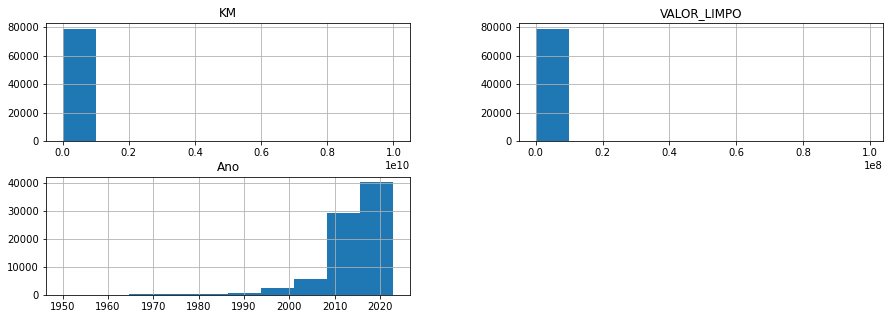

In [59]:
colunas_numericas=['KM','VALOR_LIMPO','Ano']
df_metadados_limpos_3.loc[:,colunas_numericas].hist(figsize=(15,5))
plt.show()

In [60]:
# O KM E valor_limpo possuem distribuições concentradas muito no início, o que indica que tem algo es
# tranho
# PS: Só porque não observamos as barras não signifiquem que elas não existem.
# Só significa que a diferença de frequência entre a coluna com mais frequência em relação
# às outras é muito grande, o que dá a sensação de não ter mais frequencias nos outros intervalos

KM
VALOR_LIMPO
Ano


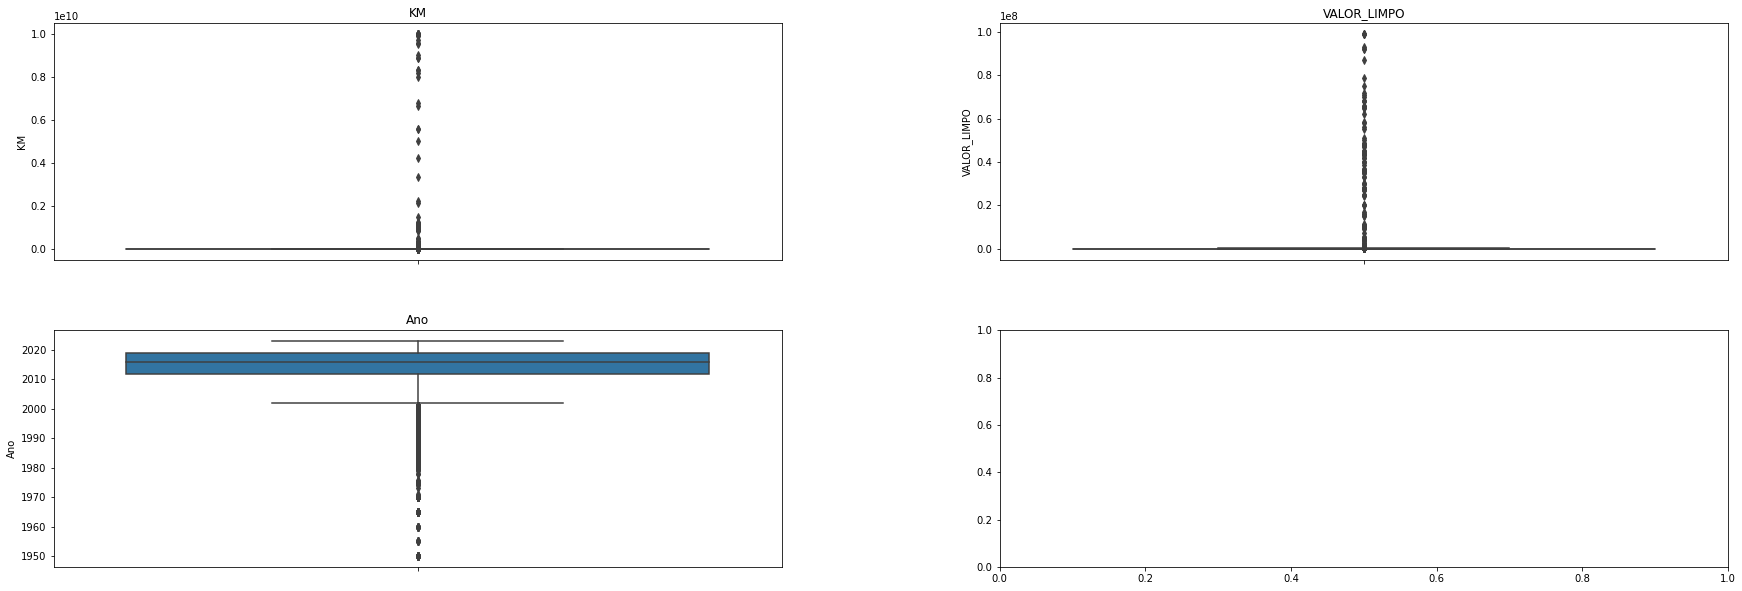

In [61]:
# Analisando a distribuição dos dados com boxplot
fig, axs = plt.subplots(2,2,figsize=(30,10))
fig.subplots_adjust(hspace = .3, wspace = .3)
axs = axs.ravel()

for i in range(len(axs)-1):
    print(colunas_numericas[i])
    sns.boxplot(y=colunas_numericas[i],data=df_final,
               ax=axs[i],showfliers=True)
    axs[i].set_title(colunas_numericas[i])
plt.show()

In [62]:
# As caixinhas tinham de estar visíveis. Caso contrário significa que existem dados que estão
# influenciando muito os gráficos, o que significa que tem algo de errado.

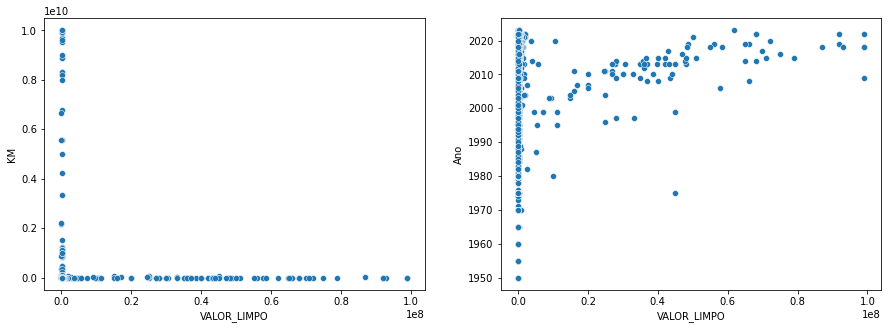

In [63]:
# Analisando a relação entre as variaveis:

fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='VALOR_LIMPO',y='KM',data=df_final,ax=axs[0])
sns.scatterplot(x='VALOR_LIMPO',y='Ano',data=df_final,ax=axs[1])

plt.show()

In [64]:
# De cada podemos que não existe uma relação linear entre os plots.
# E também podemos perceber que pode até existir uma reação não linear, mas seria uma relação muito
# sem sentido.

# Esperamos que quanto mais novo o carro, mais caro. Temos muitos carros com valor_limpo zero ou proximo.
# e também valores altos muito discrepantes (tem por exemplo um carro de ~2010 custando 10^8 reais)

# E quanto menos KM, mais caro também.

# PS: além de valores completamente surreais, também estamos passando pela pandemia, o que significa
# que carros mais velhos valorizaram, o que também influencia o plot, claro.

# PS: se formos ver a página da olx que analisamos, vamos ler que estamos na aba de 
# carros, vans E utilitários. O que significa que esses utilitarios podem ser a causa para os baixos
# valores.

In [65]:
# Tipos de regressão:

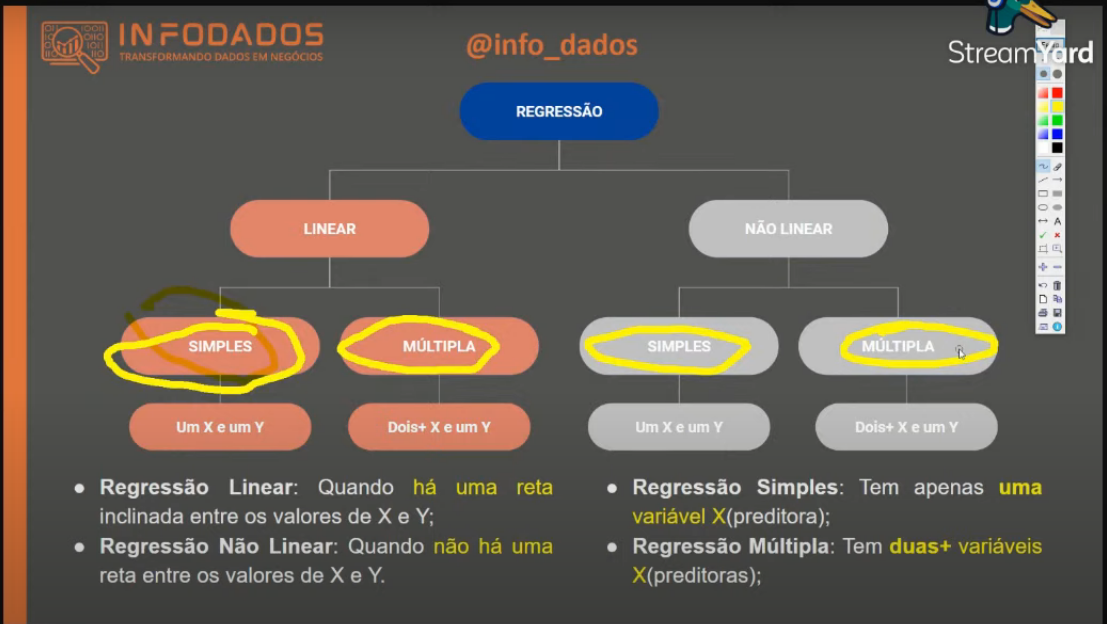

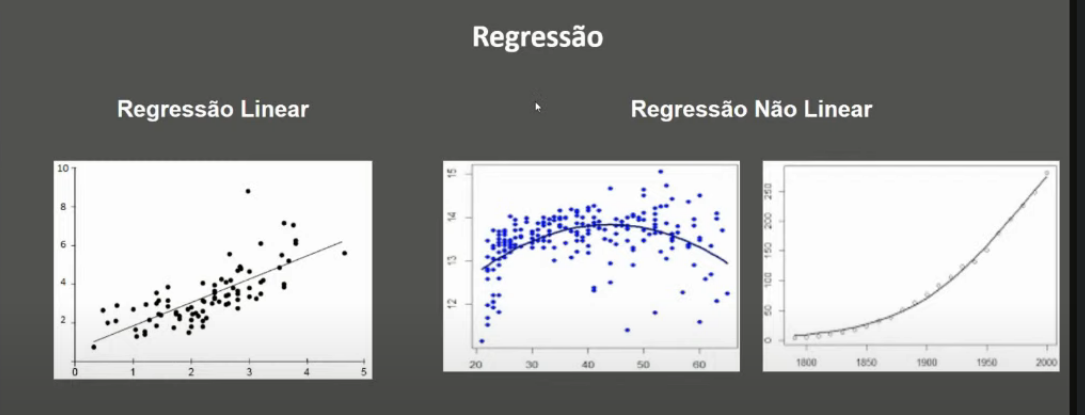

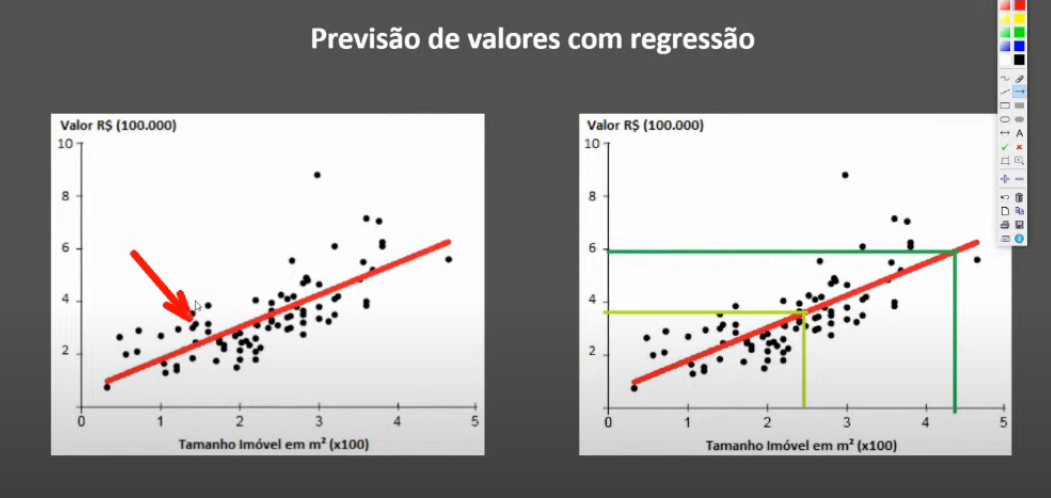

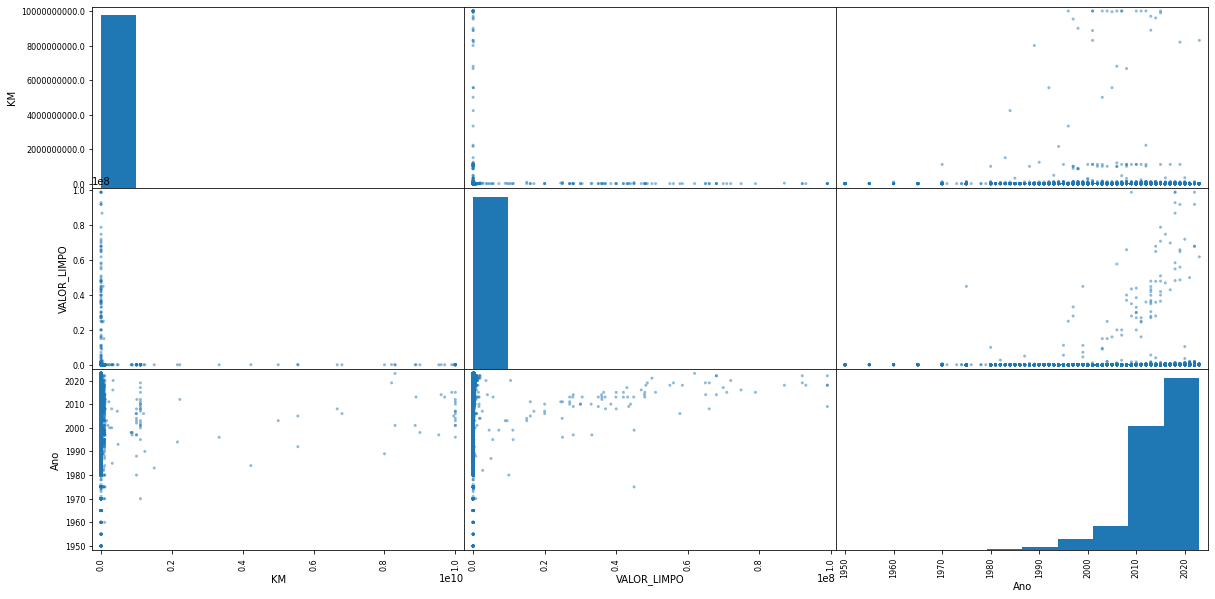

In [66]:
pd.plotting.scatter_matrix(df_final[colunas_numericas],figsize=(20,10))
plt.show()

# Analisando os outliers

## Preço

### Outlier dos preços < 5000

In [67]:

#df_final.loc[df_final['VALOR_LIMPO']<5000]

df_final.query('VALOR_LIMPO<5000') # sintaxe bem melhor! vivendo e aprendendo hehe

# Note que já temos bastantes títulos que definitivalente não são carros

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
28,1028010324,4 mil,ac,2000.0,1688500.0,manual,gasolina,4000.0
166,1027226510,vende se um fiat tempra 96,ac,1996.0,104000.0,manual,gasolina,1500.0
167,1027224897,vendo um kadett,ac,1990.0,0.0,manual,gasolina,2000.0
201,1027058831,vendo um palio,ac,1995.0,4800000.0,manual,gasolina,4000.0
219,1026992775,vendo 6 pneus,ac,2019.0,35906.0,manual,flex,500.0
...,...,...,...,...,...,...,...,...
97135,1007188334,vendo pra vc arrumar ou retirar peças,to,2000.0,0.0,manual,flex,4000.0
97182,1006657354,farol de milha gol rallye ou saveiro cross g6,to,2015.0,157000.0,manual,flex,280.0
97306,1005311730,fiesta 97/98 1.0,to,1997.0,500000.0,manual,gasolina,3800.0
97383,1004166805,monza 1.8,to,1994.0,70000.0,manual,gasolina,3500.0


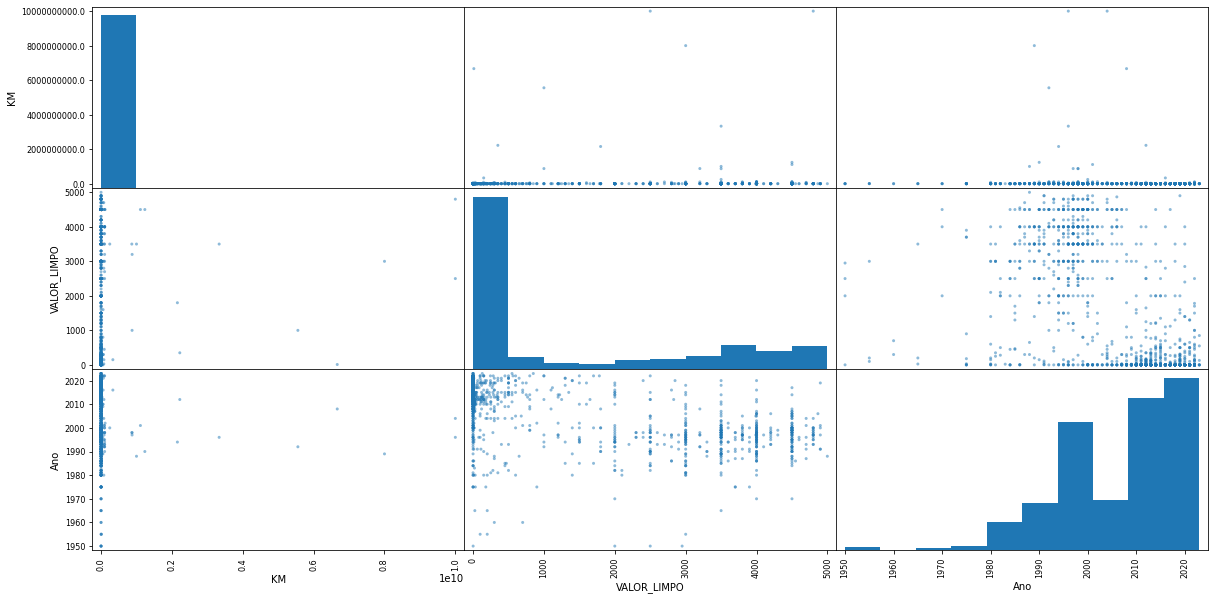

In [68]:
dados = df_final.query('VALOR_LIMPO<5000')
pd.plotting.scatter_matrix(dados[colunas_numericas],figsize=(20,10))
plt.show()

In [69]:
# Já melhorou bastante!
# Mas tem muita coisa abaixo de 1000 reais! Pode ser muito carro velho muito barato
# ou muitos utilitários abaixo de 1000

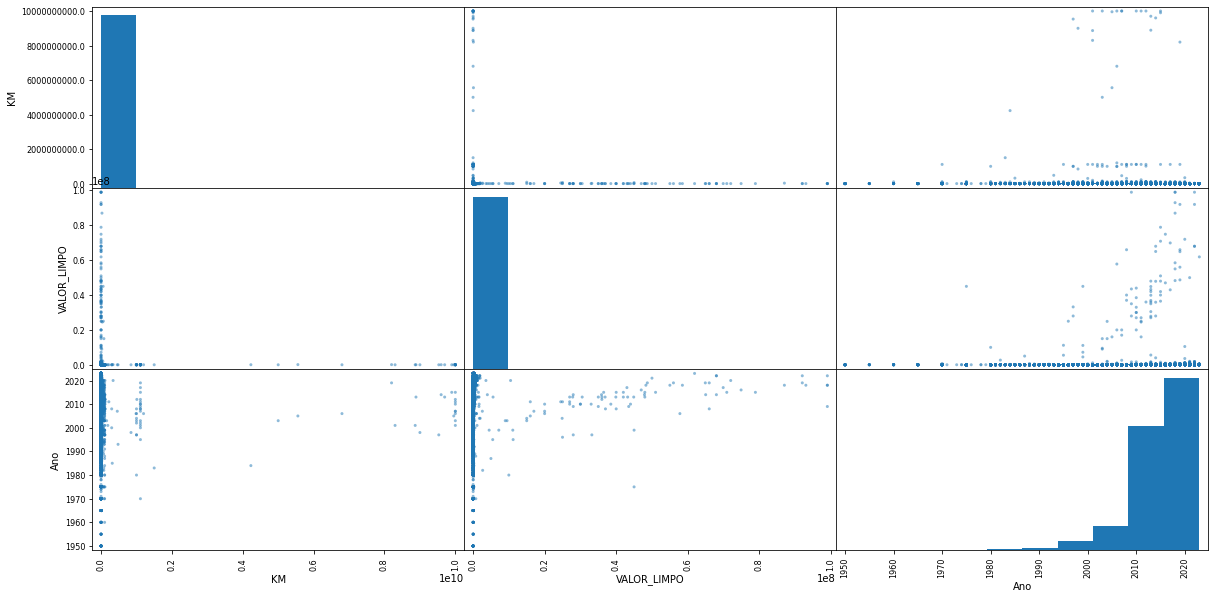

In [70]:
data = df_final.query('VALOR_LIMPO>5000')
pd.plotting.scatter_matrix(data[colunas_numericas],figsize=(20,10))
plt.show()

### Outlier dos preços > 100000

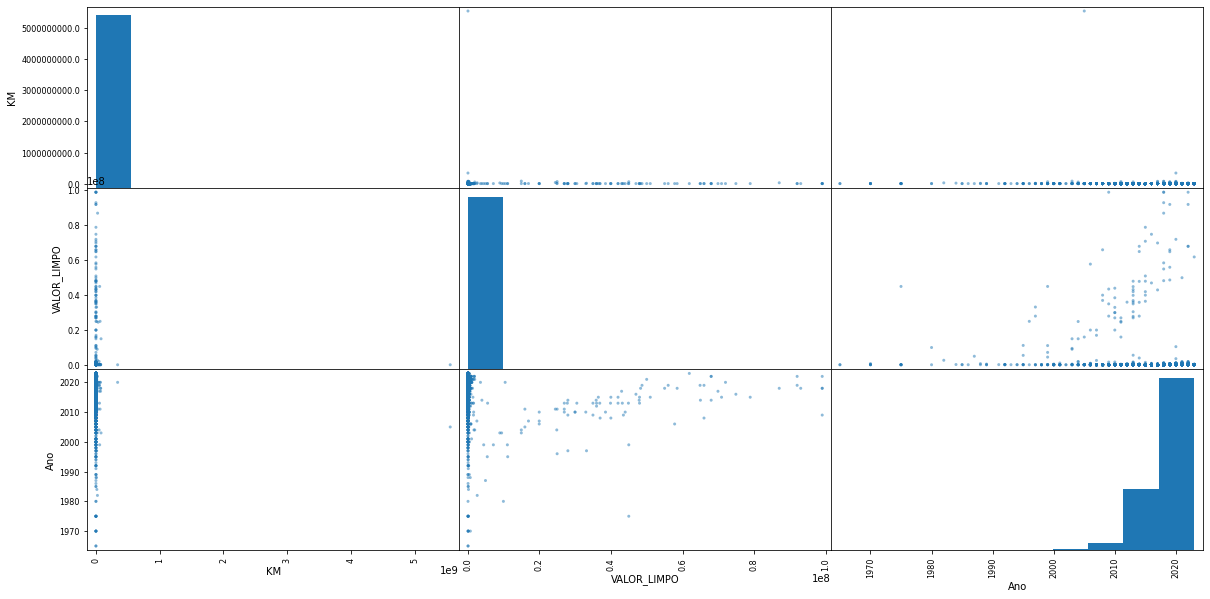

In [71]:
data = df_final.query('VALOR_LIMPO>100000')
pd.plotting.scatter_matrix(data[colunas_numericas],figsize=(20,10))
plt.show()

# de fato tem uma concentração de carros no valor próximo de 100000

In [72]:
# Fazendo um boxplot fica mais evidente os outliers desses valores
# vamos então eliminar os registros acima de 300000 (existem carros reais entre 100 e 200 kk)

df_final_lp = df_final.loc[df_final['VALOR_LIMPO']<=300000]

In [73]:
df_final_lp

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
1,1028087752,vende-se fiat uno motor fire,ac,2003.0,158.0,manual,gasolina,12500.0
2,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1028074010,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
...,...,...,...,...,...,...,...,...
97581,938971316,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,938027946,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97585,903078134,fiat strada freedom 1.3 flex 8v cd,to,2022.0,0.0,manual,flex,123900.0
97586,862284833,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


In [74]:
df_final_lp_1 = df_final_lp.loc[df_final['VALOR_LIMPO']>=3000]

## KM

In [75]:
df_final_lp_1

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
1,1028087752,vende-se fiat uno motor fire,ac,2003.0,158.0,manual,gasolina,12500.0
2,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1028074010,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
...,...,...,...,...,...,...,...,...
97581,938971316,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,938027946,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97585,903078134,fiat strada freedom 1.3 flex 8v cd,to,2022.0,0.0,manual,flex,123900.0
97586,862284833,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


### KM > 100000

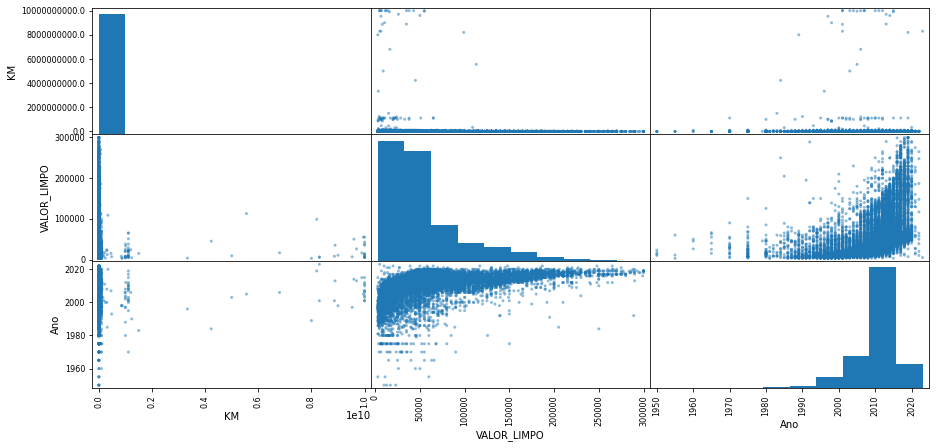

In [76]:
dados = df_final_lp_1.query("KM>100000")
pd.plotting.scatter_matrix(dados[colunas_numericas],figsize=(15,7))
plt.show()

In [77]:
# Concentração de km muito alta abaixo de 100000 então tem muita kilometragem alta

<AxesSubplot:ylabel='KM'>

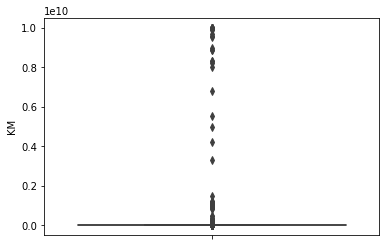

In [78]:
sns.boxplot(y='KM',data = df_final_lp_1)

<AxesSubplot:ylabel='KM'>

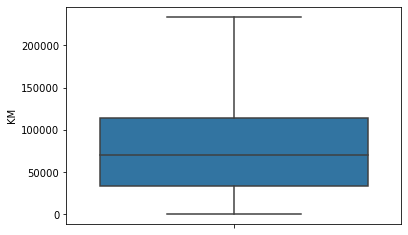

In [79]:
sns.boxplot(y='KM',data = df_final_lp_1,showfliers = False)

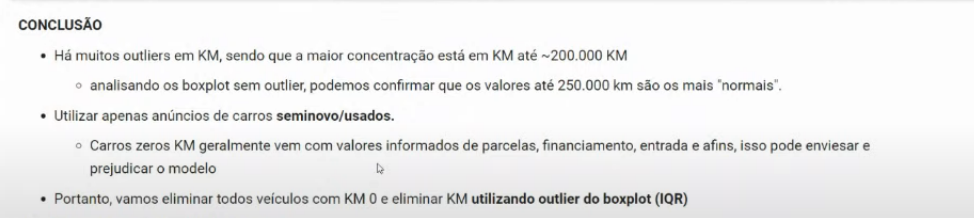

In [80]:
# Como queremos só carros seminovos/usados, então deletaremos os km > 200000 e km<5000
df_final_lp_2 = df_final_lp_1.loc[df_final_lp_1['KM']<=200000]

In [81]:
df_final_lp_3 = df_final_lp_2.loc[df_final_lp_2['KM']>=5000]

In [82]:
df_final_lp_3

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
2,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1028074010,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
5,1028072683,grand siena 2018,ac,2018.0,50000.0,manual,flex,54000.0
...,...,...,...,...,...,...,...,...
97580,942127629,ford ka 1.0 se flex 5p,to,2018.0,99000.0,manual,flex,49900.0
97581,938971316,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,938027946,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97586,862284833,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


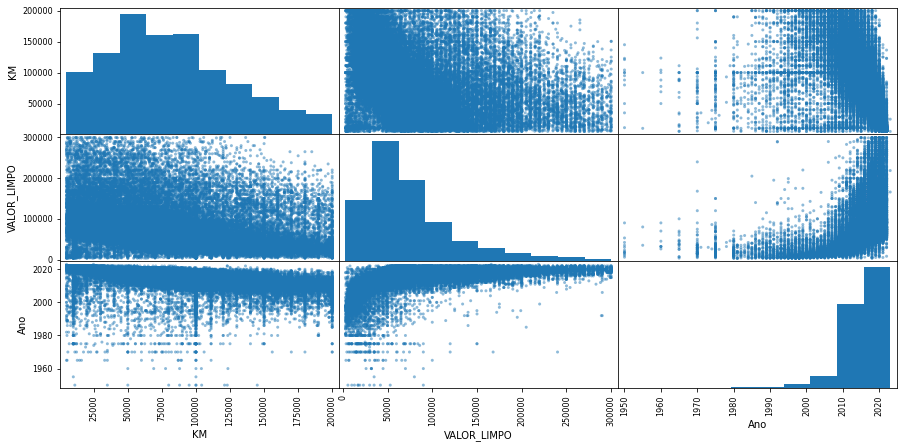

In [83]:
dados = df_final_lp_3
pd.plotting.scatter_matrix(dados[colunas_numericas],figsize=(15,7))
plt.show()

In [84]:
# Agora sim! Está bem melhor.

## Ano

In [85]:
df_final_lp_3

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
2,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1028074010,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
5,1028072683,grand siena 2018,ac,2018.0,50000.0,manual,flex,54000.0
...,...,...,...,...,...,...,...,...
97580,942127629,ford ka 1.0 se flex 5p,to,2018.0,99000.0,manual,flex,49900.0
97581,938971316,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,938027946,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97586,862284833,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


In [86]:
# Valor arbitrário. Queremos só carros seminovos/usados

df_final_lp_4 = df_final_lp_3[df_final_lp_3['Ano']>=2000]

In [87]:
df_final_lp_4

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
0,941490102,nissan versa sv,ac,2017.0,46000.0,manual,flex,56000.0
2,1028087412,fiesta titanium,ac,2013.0,86790.0,automático,gasolina,38000.0
3,1028074386,chevrolet s10 ltz diesel,ac,2013.0,89000.0,automático,diesel,131990.0
4,1028074010,vende-se fiat stilo,ac,2007.0,170000.0,manual,flex,16000.0
5,1028072683,grand siena 2018,ac,2018.0,50000.0,manual,flex,54000.0
...,...,...,...,...,...,...,...,...
97580,942127629,ford ka 1.0 se flex 5p,to,2018.0,99000.0,manual,flex,49900.0
97581,938971316,ford focus hatch glx 1.6 8v (flex) 2010/2011,to,2011.0,133290.0,manual,flex,31900.0
97582,938027946,volkswagen golf 1.6 (flex) 2010/2011,to,2011.0,113460.0,manual,flex,41900.0
97586,862284833,mitsubishi pajero tr4 2.0/ 2.0 flex 16v 4x4 aut.,to,2011.0,127000.0,automático,flex,54900.0


# Normalizando os dados

In [88]:
df_final_lp_4.loc[:,'valor_limpo_log'] = np.log(df_final_lp_3.VALOR_LIMPO)
df_final_lp_4.loc[:,'km_log'] = np.log(df_final_lp_3.KM)
df_final_lp_4.loc[:,'ano_log'] = np.log(df_final_lp_3.Ano)


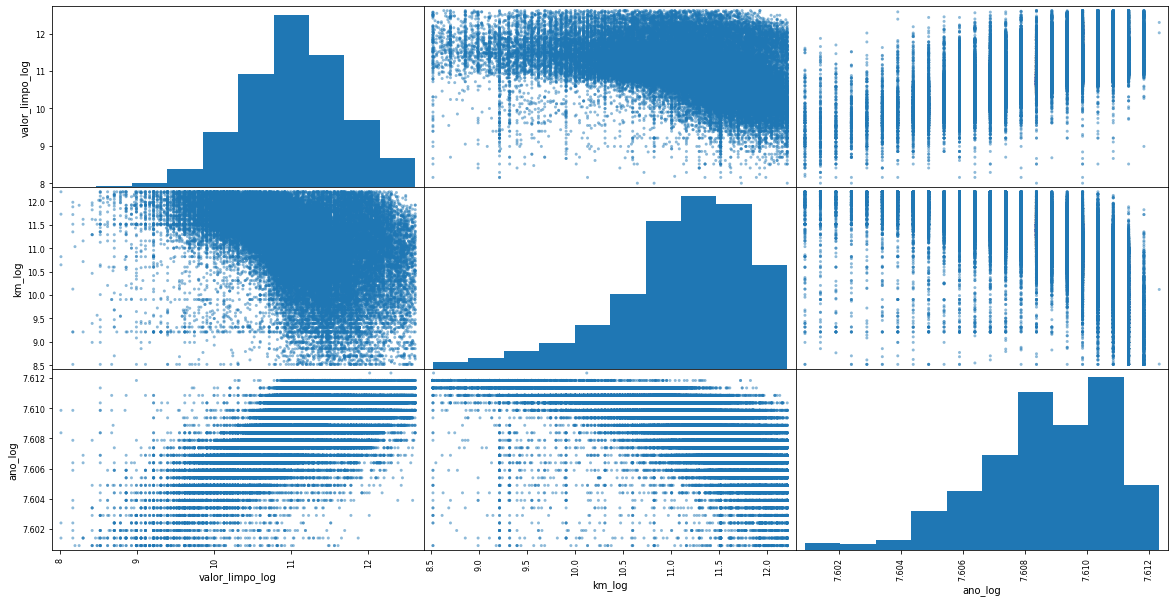

In [89]:
pd.plotting.scatter_matrix(df_final_lp_4.drop(columns=['ID','Ano','KM','VALOR_LIMPO']),figsize=(20,10))
plt.show()

In [90]:
df_final_lp_5 = df_final_lp_4.drop(columns=['ID','Ano','KM','VALOR_LIMPO'])

# Variáveis discretas

<AxesSubplot:>

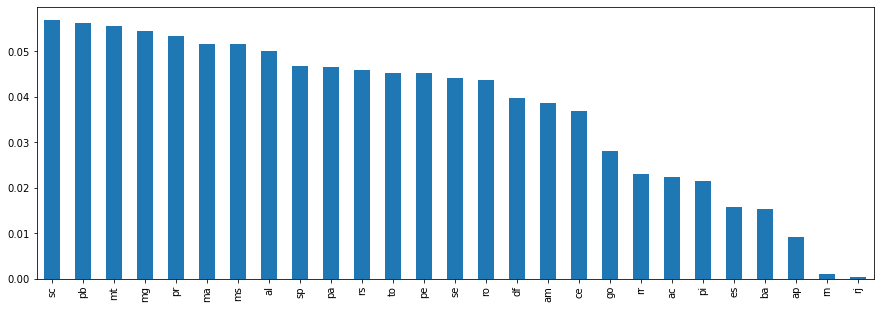

In [91]:
# analisando a proporção de anuncios por Uf

df_final_lp_5.UF.value_counts(normalize=True).plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='COMBUSTIVEL', ylabel='VALOR_LIMPO'>

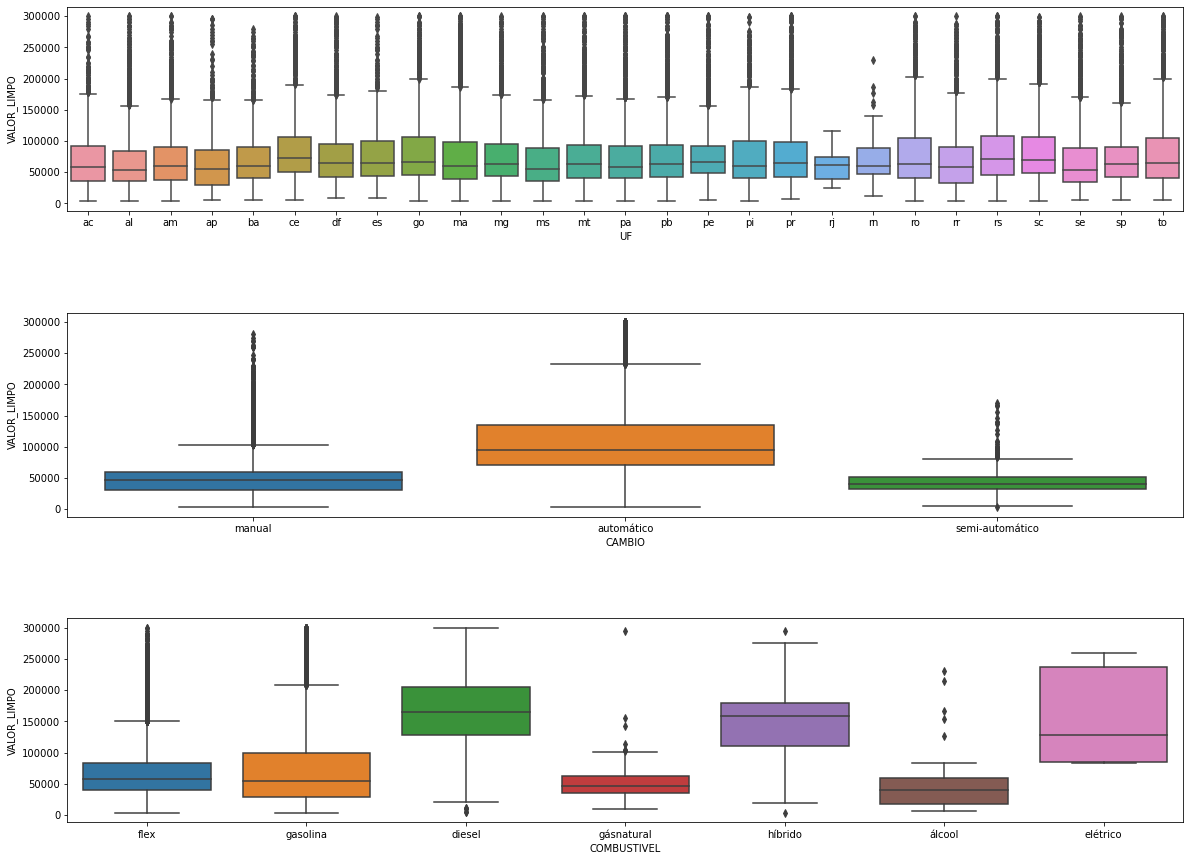

In [92]:
fig, axs = plt.subplots(3,1,figsize=(20,15))
fig.subplots_adjust(hspace=.5,wspace=.5)

sns.boxplot(x='UF',y='VALOR_LIMPO',data=df_final_lp_4,ax=axs[0])
sns.boxplot(x='CAMBIO',y='VALOR_LIMPO',data=df_final_lp_4,ax=axs[1])
sns.boxplot(x='COMBUSTIVEL',y='VALOR_LIMPO',data=df_final_lp_4,ax=axs[2])

In [93]:
# A diferença dos preços entre os estados não muda muito, o que é meio estranho.
# Mas estamos vivendo numa pandemia então anormalidades podem ser observadas.

# Já no valor pelo tipo de cambio existe uma diferença entre o manual/semi-automático com o automático
# o que significa que talvez fosse interessante considerar o cambio automático como uma variável

# Mesma conclusão que o cambio para os combustívels (diesel, hibrido e elétrico)

# Transformando variáveis discretas

In [94]:
# Modelos de machine learning não aceitam texto, então precisamos transformar as variáveis 
# discretas que estudamos acima de alguma forma. 


In [95]:
dummies_cambio_combustivel = pd.get_dummies(df_final_lp_4[['CAMBIO','COMBUSTIVEL']],prefix='',prefix_sep='')
dummies_cambio_combustivel

,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
97580,0,1,0,0,0,1,0,0,0,0
97581,0,1,0,0,0,1,0,0,0,0
97582,0,1,0,0,0,1,0,0,0,0
97586,1,0,0,0,0,1,0,0,0,0


In [96]:
df_meta = pd.concat([df_final_lp_4[['ID','Ano','ano_log','VALOR_LIMPO','valor_limpo_log','KM','km_log']],
                    dummies_cambio_combustivel],axis=1)
df_meta.columns = df_meta.columns.str.lower()

In [97]:
df_meta

,id,ano,ano_log,valor_limpo,valor_limpo_log,km,km_log,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,941490102,2017.0,7.609367,56000.0,10.933107,46000.0,10.736397,0,1,0,0,0,1,0,0,0,0
2,1028087412,2013.0,7.607381,38000.0,10.545341,86790.0,11.371247,1,0,0,0,0,0,1,0,0,0
3,1028074386,2013.0,7.607381,131990.0,11.790481,89000.0,11.396392,1,0,0,1,0,0,0,0,0,0
4,1028074010,2007.0,7.604396,16000.0,9.680344,170000.0,12.043554,0,1,0,0,0,1,0,0,0,0
5,1028072683,2018.0,7.609862,54000.0,10.896739,50000.0,10.819778,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97580,942127629,2018.0,7.609862,49900.0,10.817776,99000.0,11.502875,0,1,0,0,0,1,0,0,0,0
97581,938971316,2011.0,7.606387,31900.0,10.370361,133290.0,11.800282,0,1,0,0,0,1,0,0,0,0
97582,938027946,2011.0,7.606387,41900.0,10.643041,113460.0,11.639206,0,1,0,0,0,1,0,0,0,0
97586,862284833,2011.0,7.606387,54900.0,10.913269,127000.0,11.751942,1,0,0,0,0,1,0,0,0,0


# Análise de Correlaçãpo

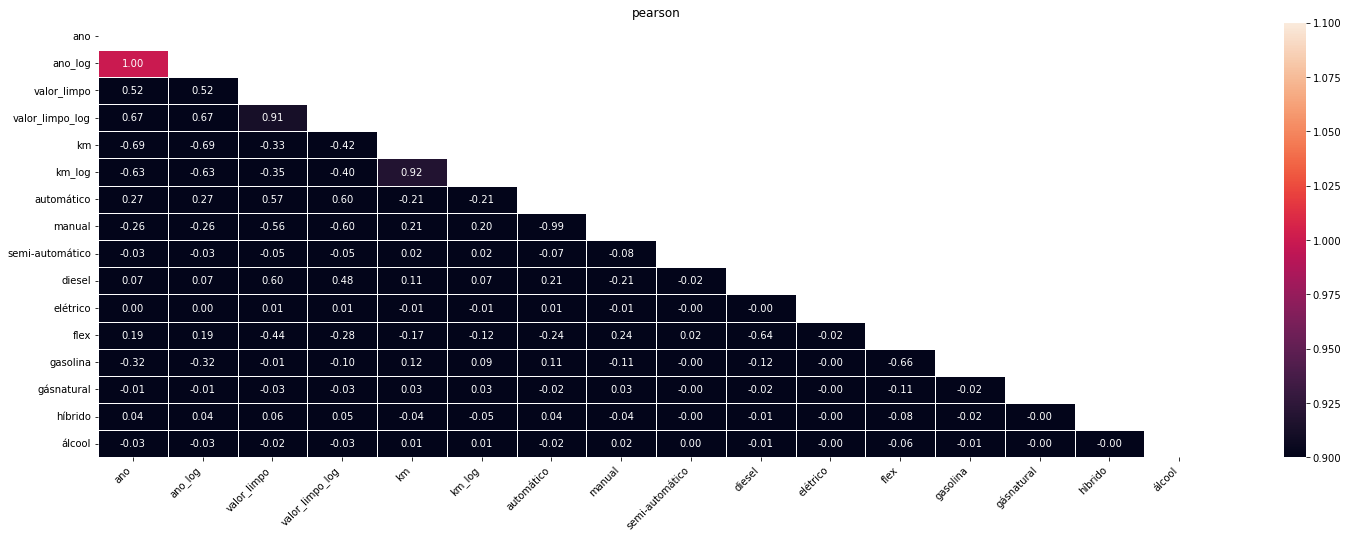

In [98]:
fig, axs = plt.subplots(1,1,figsize=(25,8),sharey=False)
fig.subplots_adjust(hspace=.5, wspace=1.35)

dados = df_meta.drop(columns=['id']).copy()
corr = dados.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask,vmax=1,vmin=1,annot=True,square=False,fmt=".2f",linewidths=.5,ax=axs)

axs.set_title("pearson")
axs.set_xticklabels(axs.get_xticklabels(),rotation=45,ha="right")

plt.show()

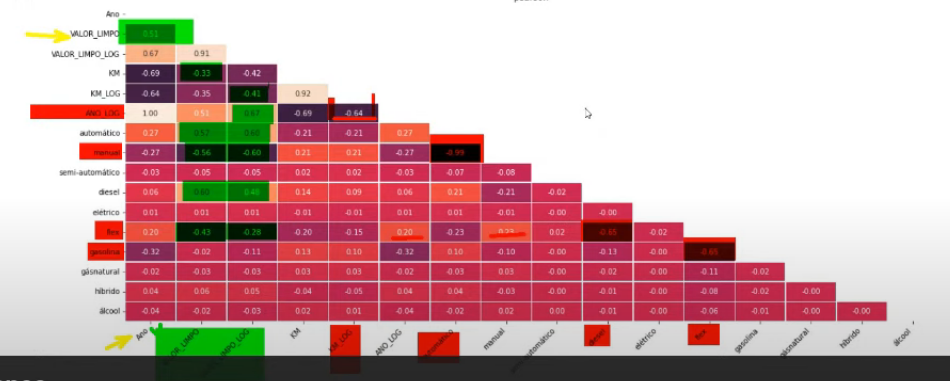

In [99]:
df_meta

,id,ano,ano_log,valor_limpo,valor_limpo_log,km,km_log,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,941490102,2017.0,7.609367,56000.0,10.933107,46000.0,10.736397,0,1,0,0,0,1,0,0,0,0
2,1028087412,2013.0,7.607381,38000.0,10.545341,86790.0,11.371247,1,0,0,0,0,0,1,0,0,0
3,1028074386,2013.0,7.607381,131990.0,11.790481,89000.0,11.396392,1,0,0,1,0,0,0,0,0,0
4,1028074010,2007.0,7.604396,16000.0,9.680344,170000.0,12.043554,0,1,0,0,0,1,0,0,0,0
5,1028072683,2018.0,7.609862,54000.0,10.896739,50000.0,10.819778,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97580,942127629,2018.0,7.609862,49900.0,10.817776,99000.0,11.502875,0,1,0,0,0,1,0,0,0,0
97581,938971316,2011.0,7.606387,31900.0,10.370361,133290.0,11.800282,0,1,0,0,0,1,0,0,0,0
97582,938027946,2011.0,7.606387,41900.0,10.643041,113460.0,11.639206,0,1,0,0,0,1,0,0,0,0
97586,862284833,2011.0,7.606387,54900.0,10.913269,127000.0,11.751942,1,0,0,0,0,1,0,0,0,0


In [100]:
df_meta.to_csv('df_meta.csv')